## **ANALISIS SENTIMEN NETIZEN TWITTER TERHADAP COVID-19 MENGGUNAKAN METODE NAIVE BAYES**

**1. Import modul files dari google.colab 
fungsinya adalah untuk mengupload file ke dalam google collab**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TRANSLATED-covid-sentiment.csv to TRANSLATED-covid-sentiment.csv


proses diatas bertujuan untuk menginput dataset kedalam notebook

**2. membaca dataset menjadi data frame
menggunakan modul pandas untuk mengubah dataset menjadi data frame**

In [ ]:
import pandas as pd

df = pd.read_csv('TRANSLATED-covid-sentiment.csv')

df

,conversation_id,date,time,user_id,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,translated
0,1258425982907637761,2020-05-07,23:58:29,1058474317,monologis_id,pemerintah lampung bantuan mahasiswa derasnya ...,[],0,3,0,[],the lampung government aid the swift student d...
1,1258320972198940675,2020-05-07,23:57:30,1179769476,its_dul,pemerintah menerapkan herd immunity kemampuan ...,['mas__piyuuu'],0,0,0,[],"the government implements herd immunity, the c..."
2,1258356644427083777,2020-05-07,23:53:20,1012156669831229441,meonkbaong,lakukan makanan berbuka sahur 10 kepala keluar...,['oiivert'],0,0,0,[],do break fasting meals 10 families affected by...
3,1258424368993931265,2020-05-07,23:52:04,1204303690061844481,rakyatdotnews,warga positif corona bupati kondisi menuntut k...,[],0,0,0,"['#rakyatdotnews', '#referensiterkini', '#raky...",positive citizen corona regent conditions dema...
4,1258423545698246656,2020-05-07,23:48:48,227620381,annisathalib_,emosi banget kondisi disuruh liputan covid dos...,[],0,0,0,['#dirumahaja'],"very emotional, conditions were told to cover ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
36924,1284921932069007362,2020-07-20,01:55:46,866077104944816129,btrxangl,hoaks hoaks beredar covid pemerintah mengendal...,[],1,0,0,[],hoaks hoaks circulating covid the government c...
36925,1284918970806611969,2020-07-20,01:32:09,1040494422608101376,monitordaycom,tingginya covid 19 majelis permusyawaratan rak...,['monitordaycom'],0,2,2,"['#monitorday', '#kopipahit']",the high covid of 19 assemblies of the people ...
36926,1284918641520070656,2020-07-20,01:30:51,997745867548377088,gemaadityaer,pakai masker cuci hand sanitizer namanya idiot...,[],0,0,0,[],"wearing hand sanitizer wash mask, the name of ..."
36927,1284918118167584771,2020-07-20,01:28:46,1122753979882958848,beritasel,kabupaten aceh selatan zona hijau terlibat pem...,[],0,0,3,[],south aceh regency green zone involved communi...


Dataset yang telah diimport akan diubah bentuk menjadi dataframe dengan menggunakan library pandas pada python tujuan membaca dataset menjadi dataframe adalah untuk memudahkan proses pengolahan data

**3. membuat label menggunakan textbloob**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


mengimport semua library yang dibutuhkan untuk membuat label menggunakan textbloob

In [ ]:
df.drop_duplicates(subset ="tweet", keep = "first", inplace = True) 
df['tweet'] = df['tweet'].astype('str') 
def get_polarity(text): return TextBlob(text).sentiment.polarity 
df['Polarity'] = df['tweet'].apply(get_polarity)

proses diatas bertujuan untuk mendapatkan nilai polarity pada tweet di dataframe

In [ ]:
df['Sentiment_Type']=''
df.loc[df.Polarity>0,'Sentiment_Type']='POSITIVE'
df.loc[df.Polarity==0,'Sentiment_Type']='NEUTRAL'
df.loc[df.Polarity<0,'Sentiment_Type']='NEGATIVE'

menentukan kelas untuk sentiment dimana:




polarity > 0 maka sentiment positif




polarity = 0 maka sentiment netral




polarity < 0 maka sentiment negatif






**4. mengimport semua modul yang diperlukan**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import re
import networkx as nx
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')
from nltk.corpus import stopwords
from nltk import bigrams
import warnings
warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**5. membuang semua kolom atau fitur yang tidak digunakan**

In [ ]:
df1 = df.drop(['conversation_id', 'time', 'username', 'mentions', 'replies_count', 'retweets_count', 'likes_count', 'date', 'user_id',], axis=1)
df1

,tweet,hashtags,translated,Polarity,Sentiment_Type
0,pemerintah lampung bantuan mahasiswa derasnya ...,[],the lampung government aid the swift student d...,0.0,NEUTRAL
1,pemerintah menerapkan herd immunity kemampuan ...,[],"the government implements herd immunity, the c...",0.0,NEUTRAL
2,lakukan makanan berbuka sahur 10 kepala keluar...,[],do break fasting meals 10 families affected by...,0.0,NEUTRAL
3,warga positif corona bupati kondisi menuntut k...,"['#rakyatdotnews', '#referensiterkini', '#raky...",positive citizen corona regent conditions dema...,0.0,NEUTRAL
4,emosi banget kondisi disuruh liputan covid dos...,['#dirumahaja'],"very emotional, conditions were told to cover ...",0.0,NEUTRAL
...,...,...,...,...,...
36924,hoaks hoaks beredar covid pemerintah mengendal...,[],hoaks hoaks circulating covid the government c...,0.0,NEUTRAL
36925,tingginya covid 19 majelis permusyawaratan rak...,"['#monitorday', '#kopipahit']",the high covid of 19 assemblies of the people ...,0.0,NEUTRAL
36926,pakai masker cuci hand sanitizer namanya idiot...,[],"wearing hand sanitizer wash mask, the name of ...",-0.8,NEGATIVE
36927,kabupaten aceh selatan zona hijau terlibat pem...,[],south aceh regency green zone involved communi...,0.0,NEUTRAL


pada df1 kita membuang semua kolom yang tidak dibutuhkan dan menggunakan kolom-kolom yang seperlunya kita butuhkan

**6. melakukan cleaning pada tweet 
berfungsi untuk membersihkan tweet agar lebih mudah di analisis, lalu menyimpan ke file dataset baru dan dibaca menjadi data frame**

In [ ]:
df1['clean_tweet'] = df1['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))

melakukan clean tweet untuk membersihkan tweet dari stopwords dengan perulangan terhadap library stopwords. Dengan logika yaitu




jika item tidak ada di stopwords, maka:




  df1['tweet'].apply

In [ ]:
df1.to_csv('covidfinal.csv')

mengubah format df1 dari dataframe menjadi dataset csv

In [ ]:

df2 = pd.read_csv('covidfinal.csv')

df2

,Unnamed: 0,tweet,hashtags,translated,Polarity,Sentiment_Type,clean_tweet
0,0,pemerintah lampung bantuan mahasiswa derasnya ...,[],the lampung government aid the swift student d...,0.0,NEUTRAL,pemerintah lampung bantuan mahasiswa derasnya ...
1,1,pemerintah menerapkan herd immunity kemampuan ...,[],"the government implements herd immunity, the c...",0.0,NEUTRAL,pemerintah menerapkan herd immunity kemampuan ...
2,2,lakukan makanan berbuka sahur 10 kepala keluar...,[],do break fasting meals 10 families affected by...,0.0,NEUTRAL,lakukan makanan berbuka sahur 10 kepala keluar...
3,3,warga positif corona bupati kondisi menuntut k...,"['#rakyatdotnews', '#referensiterkini', '#raky...",positive citizen corona regent conditions dema...,0.0,NEUTRAL,warga positif corona bupati kondisi menuntut k...
4,4,emosi banget kondisi disuruh liputan covid dos...,['#dirumahaja'],"very emotional, conditions were told to cover ...",0.0,NEUTRAL,emosi banget kondisi disuruh liputan covid dos...
...,...,...,...,...,...,...,...
36924,36924,hoaks hoaks beredar covid pemerintah mengendal...,[],hoaks hoaks circulating covid the government c...,0.0,NEUTRAL,hoaks hoaks beredar covid pemerintah mengendal...
36925,36925,tingginya covid 19 majelis permusyawaratan rak...,"['#monitorday', '#kopipahit']",the high covid of 19 assemblies of the people ...,0.0,NEUTRAL,tingginya covid 19 majelis permusyawaratan rak...
36926,36926,pakai masker cuci hand sanitizer namanya idiot...,[],"wearing hand sanitizer wash mask, the name of ...",-0.8,NEGATIVE,pakai masker cuci hand sanitizer namanya idiot...
36927,36927,kabupaten aceh selatan zona hijau terlibat pem...,[],south aceh regency green zone involved communi...,0.0,NEUTRAL,kabupaten aceh selatan zona hijau terlibat pem...


**7. menampilkan hasil tweet yang telah di cleaning**

In [ ]:
df2['text'] = df2['clean_tweet']
df2['text']

0        pemerintah lampung bantuan mahasiswa derasnya ...
1        pemerintah menerapkan herd immunity kemampuan ...
2        lakukan makanan berbuka sahur 10 kepala keluar...
3        warga positif corona bupati kondisi menuntut k...
4        emosi banget kondisi disuruh liputan covid dos...
                               ...                        
36924    hoaks hoaks beredar covid pemerintah mengendal...
36925    tingginya covid 19 majelis permusyawaratan rak...
36926    pakai masker cuci hand sanitizer namanya idiot...
36927    kabupaten aceh selatan zona hijau terlibat pem...
36928    keluyurann rumah pekerjaan beli sembako jalan ...
Name: text, Length: 36929, dtype: object

**8. melakukan remove URL agar tweet lebih bersih**

In [ ]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
all_tweets_no_urls = [remove_url(tweet) for tweet in df2['text']]
all_tweets_no_urls[:5]

['pemerintah lampung bantuan mahasiswa derasnya donasi masuk pemerintah provinsi lampung tim gugus tugas covid 19',
 'pemerintah menerapkan herd immunity kemampuan pemerintah nihil pemberantasan covid gambling kuat bertahan hidup lemah mati negara serius menangani virus',
 'lakukan makanan berbuka sahur 10 kepala keluarga terdampak covid tasik bantuan pemerintah masuk data ramadan rencanakan paket sembako lengkap semoga rejekinya',
 'warga positif corona bupati kondisi menuntut kebersamaan rakyat news bantaeng pemerintah kabupaten bantaeng tim gugus tugas penanganan covid 19 bantaeng merilis rakyatdotnews referensiterkini rakyatnews',
 'emosi banget kondisi disuruh liputan covid dosen bercanda sih pemerintah menyuruh dirumahaja disuruh liputan rumah']

In [ ]:
df3 = pd.Series(all_tweets_no_urls)
words_in_tweet = df3.str.lower().str.split() #untuk tweet di all_tweets_no_urls]
words_in_tweet[:2]

0    [pemerintah, lampung, bantuan, mahasiswa, dera...
1    [pemerintah, menerapkan, herd, immunity, kemam...
dtype: object

**9. membuat list dari semua kata dari tweet** 

In [ ]:
# List of all words
all_words_no_urls = list(itertools.chain(*words_in_tweet))

**10. melakukan perhitungan untuk kata yang paling sering muncul**

In [ ]:
# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)
counts_no_urls.most_common(15)

[('covid', 41096),
 ('pemerintah', 40628),
 ('19', 33369),
 ('indonesia', 7456),
 ('pandemi', 6733),
 ('masyarakat', 6639),
 ('penanganan', 4563),
 ('penyebaran', 4309),
 ('virus', 3975),
 ('orang', 3497),
 ('corona', 3477),
 ('2020', 3289),
 ('kebijakan', 3227),
 ('normal', 3226),
 ('kesehatan', 3177)]

dapat kita lihat pada list diatas bahwa kata yang paling banyak muncuk adalah covid. dengan algoritma counter

> 
lakukan perulangan tiap tweet :


> jika kata == kata pada tweet maka :


> kata += 1





In [ ]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])
clean_tweets_no_urls.head()

,words,count
0,covid,41096
1,pemerintah,40628
2,19,33369
3,indonesia,7456
4,pandemi,6733


**11. membuang stopwords**

In [ ]:
stop_words = set(stopwords.words('indonesian'))

In [ ]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]
tweets_nsw[0]

['pemerintah',
 'lampung',
 'bantuan',
 'mahasiswa',
 'derasnya',
 'donasi',
 'masuk',
 'pemerintah',
 'provinsi',
 'lampung',
 'tim',
 'gugus',
 'tugas',
 'covid',
 '19']

kita membuang kata-kata yang mungkin akan mempengaruhi hasil dari sentiment agar klasifikasi bekerja dengan baik

**12. membuat plot untuk kata yang paling sering muncul**

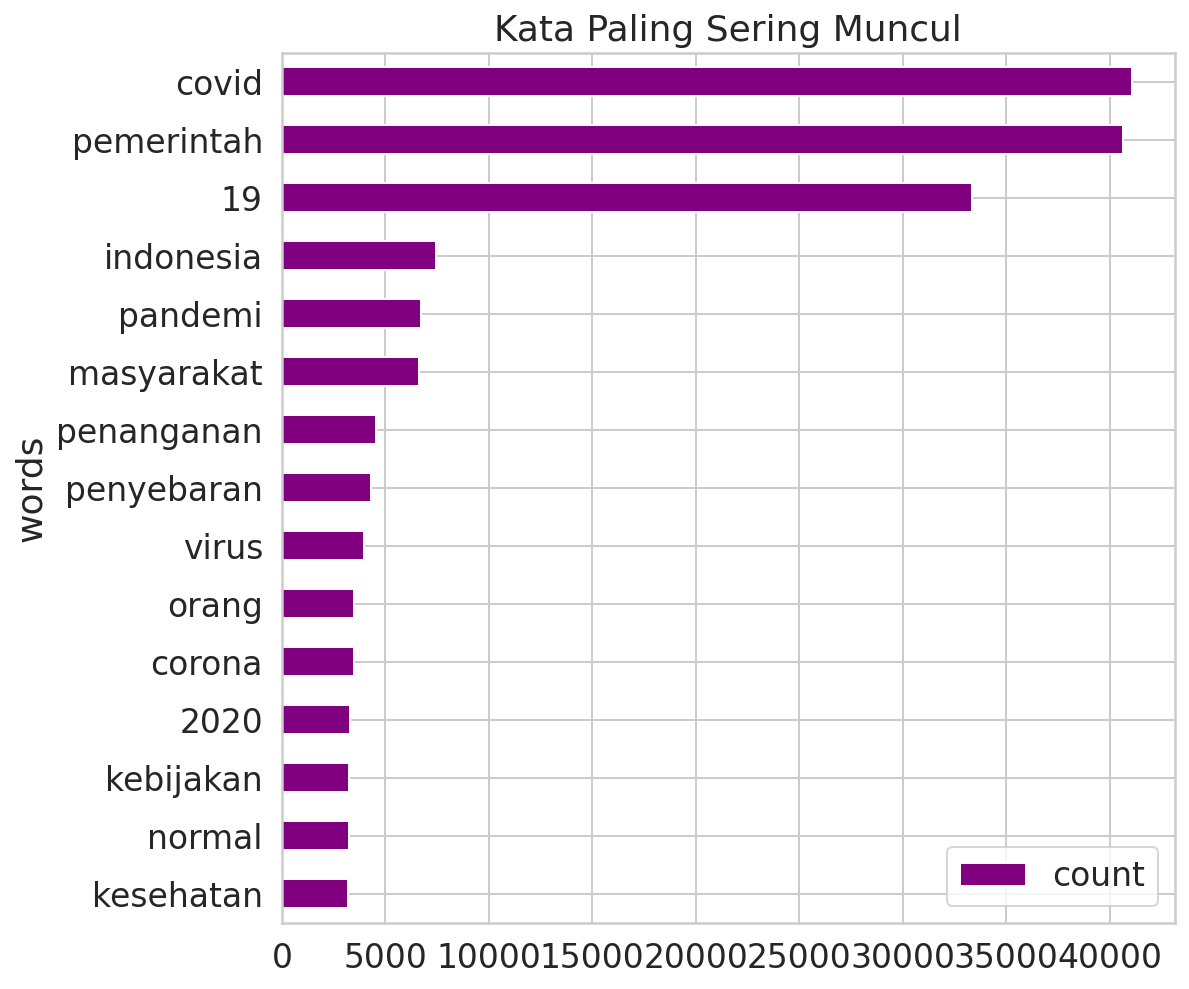

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count', ax=ax,  color="purple")
ax.set_title("Kata Paling Sering Muncul") 
plt.show()

kata yang sering muncul di dataset kita plot dengan menggunakan matplotlib dengan bentuk grafik agar data lebih mudah dibaca

**13. plotting untuk sentiment**

In [ ]:
import collections

Text(0.5, 1.0, 'Dataset labels distribuition')

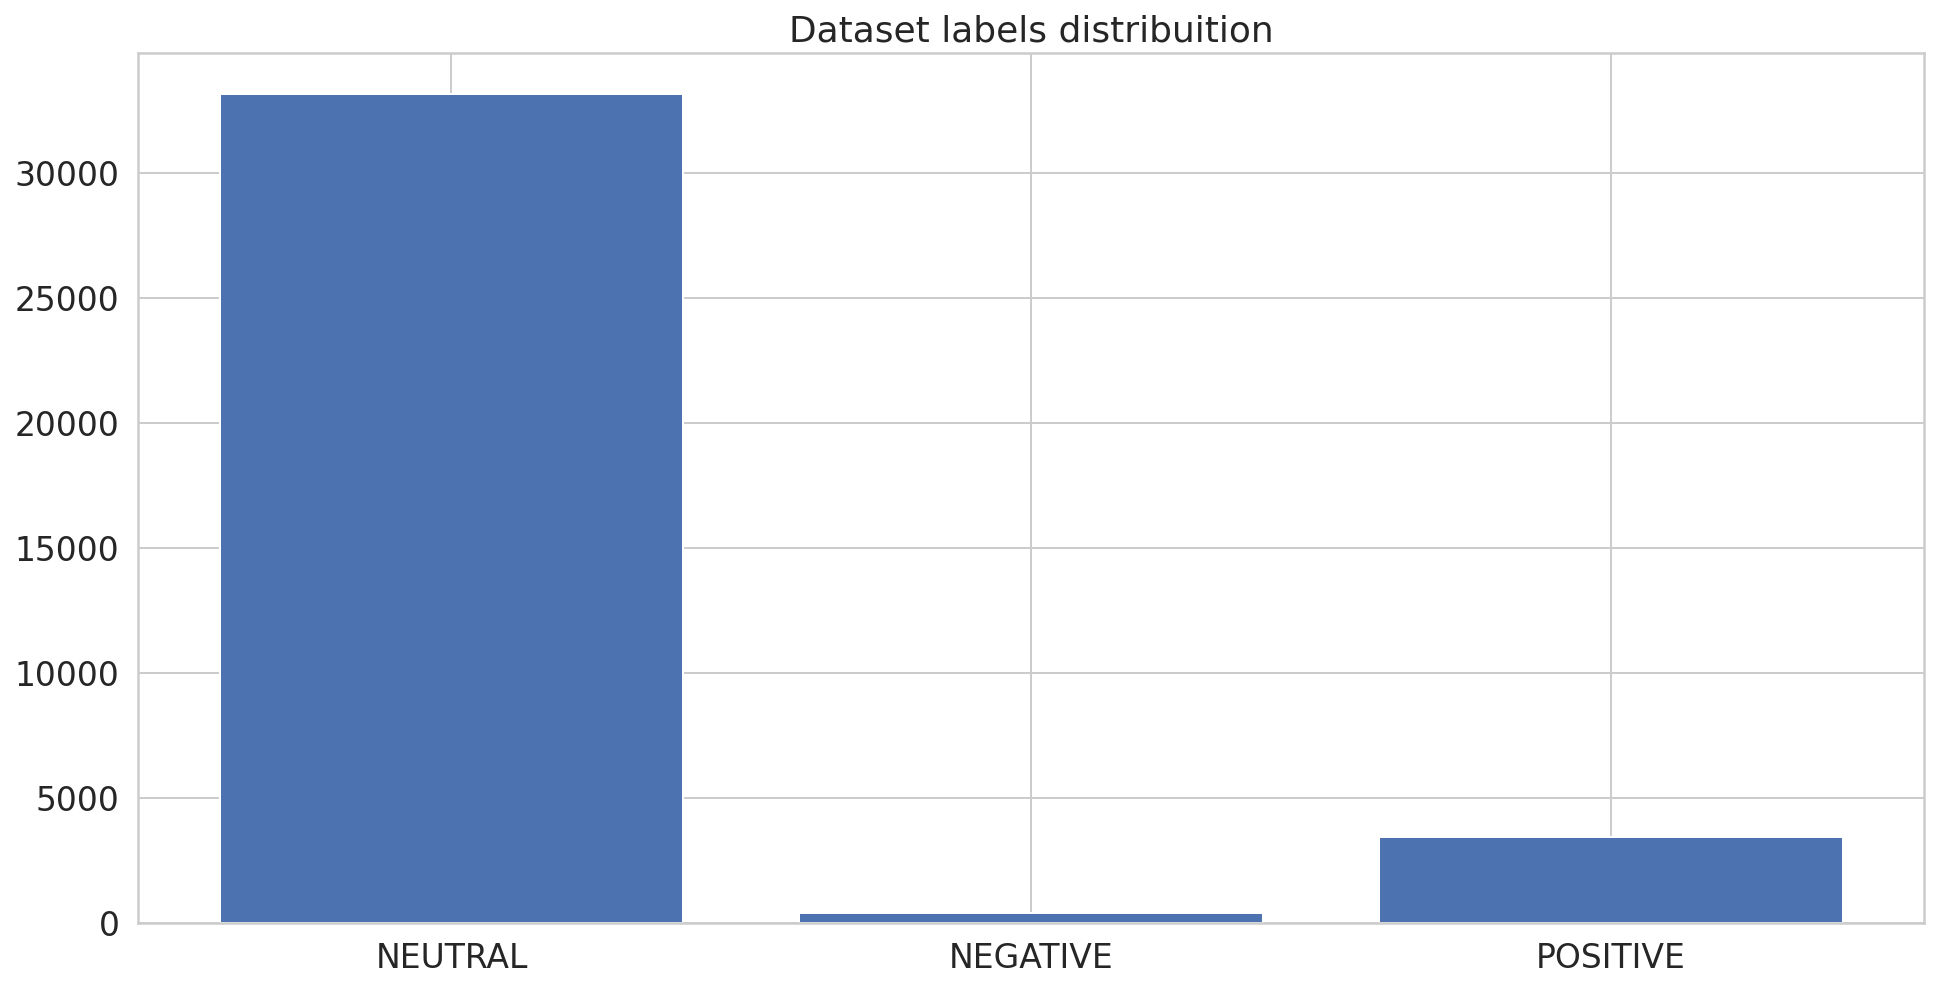

In [ ]:
target_cnt = collections.Counter(df.Sentiment_Type)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

grafik diatas adalah hasil untuk ploting sentiment dimana kita dapatkan sentiment terbanyak dari dataset adalah netral diikuti oleh positif dan yang paling sedikit adalah negatif

In [ ]:
df4 = df2.drop(['tweet', 'Unnamed: 0'], axis=1)
df4

,hashtags,translated,Polarity,Sentiment_Type,clean_tweet,text
0,[],the lampung government aid the swift student d...,0.0,NEUTRAL,pemerintah lampung bantuan mahasiswa derasnya ...,pemerintah lampung bantuan mahasiswa derasnya ...
1,[],"the government implements herd immunity, the c...",0.0,NEUTRAL,pemerintah menerapkan herd immunity kemampuan ...,pemerintah menerapkan herd immunity kemampuan ...
2,[],do break fasting meals 10 families affected by...,0.0,NEUTRAL,lakukan makanan berbuka sahur 10 kepala keluar...,lakukan makanan berbuka sahur 10 kepala keluar...
3,"['#rakyatdotnews', '#referensiterkini', '#raky...",positive citizen corona regent conditions dema...,0.0,NEUTRAL,warga positif corona bupati kondisi menuntut k...,warga positif corona bupati kondisi menuntut k...
4,['#dirumahaja'],"very emotional, conditions were told to cover ...",0.0,NEUTRAL,emosi banget kondisi disuruh liputan covid dos...,emosi banget kondisi disuruh liputan covid dos...
...,...,...,...,...,...,...
36924,[],hoaks hoaks circulating covid the government c...,0.0,NEUTRAL,hoaks hoaks beredar covid pemerintah mengendal...,hoaks hoaks beredar covid pemerintah mengendal...
36925,"['#monitorday', '#kopipahit']",the high covid of 19 assemblies of the people ...,0.0,NEUTRAL,tingginya covid 19 majelis permusyawaratan rak...,tingginya covid 19 majelis permusyawaratan rak...
36926,[],"wearing hand sanitizer wash mask, the name of ...",-0.8,NEGATIVE,pakai masker cuci hand sanitizer namanya idiot...,pakai masker cuci hand sanitizer namanya idiot...
36927,[],south aceh regency green zone involved communi...,0.0,NEUTRAL,kabupaten aceh selatan zona hijau terlibat pem...,kabupaten aceh selatan zona hijau terlibat pem...


**15. OneHot Encoding**

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
df4 = df4.apply(le.fit_transform)
df4.head()

,hashtags,translated,Polarity,Sentiment_Type,clean_tweet,text
0,4382,32839,58,1,24427,24427
1,4382,30316,58,1,25046,25046
2,4382,9316,58,1,15225,15225
3,3392,22758,58,1,36320,36320
4,1090,35497,58,1,7832,7832


LabelEncoding adalah proses mengubah data kategorikal menjadi numerikal yang berjuan agar data dapat diolah oleh model 


label encode akan melakukan encoding terhadap label dengan nilai antara 0 dan n_class-1


In [ ]:
df4.to_csv('finalencode.csv')

In [ ]:
df5 = pd.read_csv('finalencode.csv')

In [ ]:
df6 = df5.drop(['text', 'Unnamed: 0'], axis=1)
df6

,hashtags,translated,Polarity,Sentiment_Type,clean_tweet
0,4382,32839,58,1,24427
1,4382,30316,58,1,25046
2,4382,9316,58,1,15225
3,3392,22758,58,1,36320
4,1090,35497,58,1,7832
...,...,...,...,...,...
36924,4382,14305,58,1,9618
36925,2488,32349,58,1,35097
36926,4382,35828,2,0,20203
36927,4382,26584,58,1,12092


**14. ploting hasil sentiment dengan pie chart**

([<matplotlib.patches.Wedge at 0x7fe934e1ab10>,
 [Text(-1.0433779599936208, 0.3483711133253593, '0'),
  Text(1.032027136782064, -0.3806835811345367, '2'),
  Text(1.0994668500316414, -0.03424391451777029, '1')])

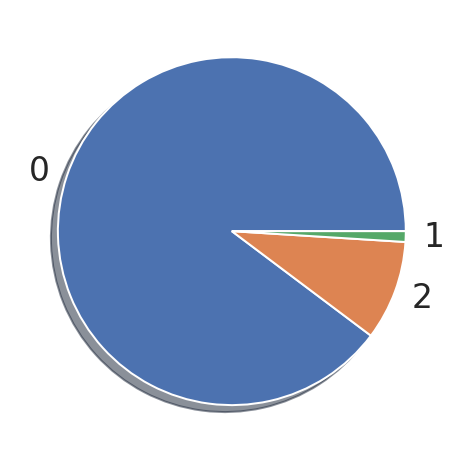

In [ ]:
plt.pie(df['Sentiment_Type'].value_counts(), labels={'0','1','2'}, shadow=True)

In [ ]:
df6.Sentiment_Type.value_counts()

1    33141
2     3422
0      366
Name: Sentiment_Type, dtype: int64

hasil diatas adalah hasil perhitungan berapa banyak yang positif, negatif dan netral. dadapatlah hasil sebagai berikut :



positf = 33141



netral = 3422




negatif = 366


**15. scaling data**

In [ ]:
x = df6.drop(['Polarity'], axis=1)

y = df6['Polarity']

In [ ]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
scal.fit(x)
scal_data = scal.transform(x)
scal_data = pd.DataFrame(scal_data, columns = x.columns)
scal_data.head()

,hashtags,translated,Sentiment_Type,clean_tweet
0,0.509016,1.352022,-0.267466,0.559355
1,0.509016,1.115068,-0.267466,0.617420
2,0.509016,-0.857197,-0.267466,-0.303832
3,-0.327268,0.405241,-0.267466,1.674971
4,-2.271840,1.601654,-0.267466,-0.997328


standard scalling adalah fitur standarisasi yang menmbuang rata-rata dan melakukan scalling pada masing-masing unit

> 
standar skor dari sampel dapat dihitung dengan

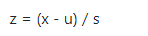





**16. splitting dataset**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

proses diatas adalah pembagian dataset menjadi train dan test untuk melatih dan validasi model yang akan dibangun

dataframe dibagi menjadi 2 yaitu x dan y dimana x untuk fitur dan y untuk label

dengan ukuran pembagian yaitu 0.3 yang artinyal 70% untuk train dan 30% untuk test





**17. Build Model Naive Bayes**

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

proses diatas adalah proses untuk membuat model menggunakan algoritma naive bayes dengan rumus

>
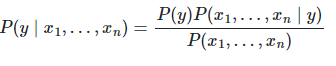


>dengan menggunakan kondisi naive maka dapat diasumsikan sebagai

>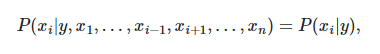



>kita juga bisa menggunakan classification rules


>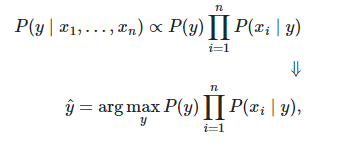









**18. score untuk training dan testing**

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.9077
Test set score: 0.9037


proses diatas adalah proses untuk menampilkan hasil akurasi dari training dan testing menngunakan model naive bayes dengan fungsi yaitu:


fit(x, y[, sample_weight])

dengan cara mencocokan gaussian naive bayes berdasarkan x dan y

lalu untuk mendapatkan skor menggunakan fungsi :

score(X, y[, sample_weight])

menguluarkan nilai rata-rata akurasi yang telah dikeluarkan oleh test data dan label

dengan rumus rata-rata akurasi adalah sebagai berikut

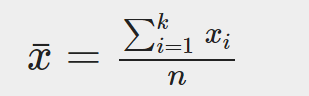

dimana 

xi adalah nilai akurasi testing dan training dari i=1 sampai dengan k 

n adalah banyaknya nilai akurasi yang telah didapatkan

